In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import numpy as np

In [3]:
orders = pd.read_excel(r'Sample - Tableau Superstore Dataset.xls', sheet_name = 0)

# Analyzing Orders table

In [4]:
print(orders.shape)
# around 10000 rows
print(orders.dtypes)

(9994, 21)
Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [22]:
orders['Row ID'].isna().sum()

0

In [23]:
orders.isna().sum()
#no missing values

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [24]:
# all the orders are from United States
# there are no duplicate rows
orders.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [25]:
# checking Order Date
print(orders['Order Date'].min(), orders['Order Date'].max())
# checking Ship Date
print(orders['Ship Date'].min(), orders['Ship Date'].max())

2014-01-03 00:00:00 2017-12-30 00:00:00
2014-01-07 00:00:00 2018-01-05 00:00:00


In [26]:
# there were a total of 5009  unique orders with multiple products per order
print(orders.drop_duplicates(subset=['Order ID']).shape)
# average order has 2 products 
print(orders.groupby('Order ID').count()['Product ID'].mean())
# average order has between 7-8 products ordered 
print(orders.groupby('Order ID').sum()['Quantity'].mean())

(5009, 21)
1.9952086244759433
7.560990217608305


In [27]:
# reading returns, visualizing any trends and removing them from main dataset, so as not to count in sales
returns = pd.read_excel(r'Sample - Tableau Superstore Dataset.xls', sheet_name = 1)

print(returns.shape)
# there were a total of 296 orders returned



(296, 2)


# Analyzing Returns

In [28]:
# combining with orders to find trend
returns = pd.merge(orders, returns)

In [29]:
r_q = returns.groupby(returns['Order Date'].dt.to_period('Q'))['Sales'].sum()
r_y = returns.groupby(returns['Order Date'].dt.to_period('Y'))['Sales'].sum()

r_y_p = returns.groupby(returns['Order Date'].dt.to_period('Y'))['Profit'].sum()
r_q_p = returns.groupby(returns['Order Date'].dt.to_period('Q'))['Profit'].sum()

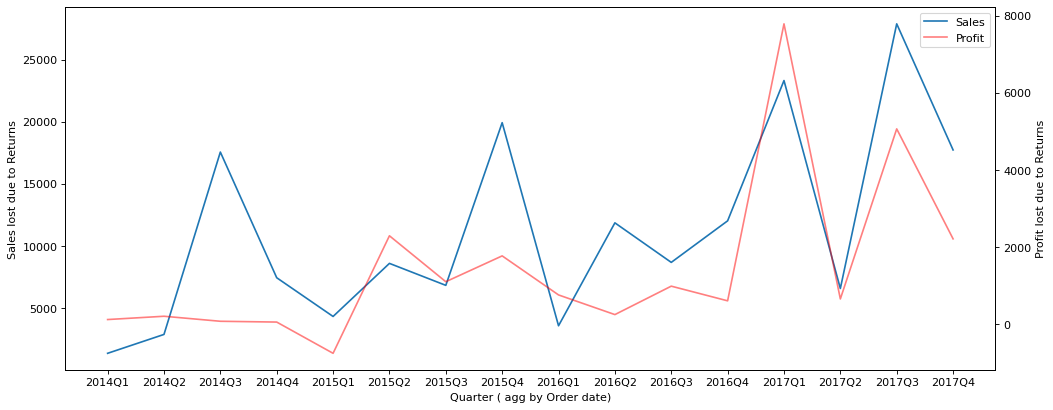

In [30]:
plt.figure(figsize=(15, 6), dpi=80)
ax1 = plt.gca()
line1, = ax1.plot(r_q.index.to_series().astype(str), r_q)
ax2 = ax1.twinx()
line2, = ax2.plot(r_q_p.index.to_series().astype(str), r_q_p, c = 'r',alpha=0.5)
ax1.set_xlabel('Quarter ( agg by Order date)')
ax1.set_ylabel('Sales lost due to Returns')
ax2.set_ylabel("Profit lost due to Returns")

ax2.legend((line1, line2),
           ("Sales", "Profit"))
plt.show()
# Most losses due to returns took place in 2017Q1

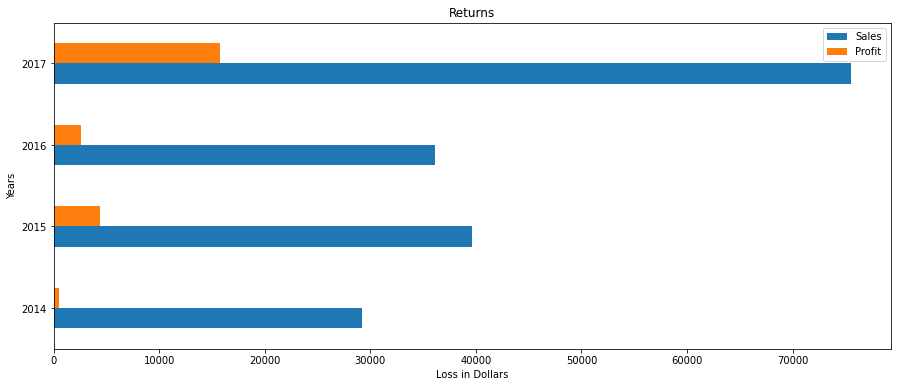

In [31]:
# plt.figure(figsize=(15, 6), dpi=80)
# ax1 = plt.gca()
# ax1.bar(r_y.index.to_series().astype(str), r_y)
# ax2 = plt.gca()
# ax2.bar(r_y_p.index.to_series().astype(str), r_y_p)
# ax1.set_xlabel('Year ( agg by Order date)')
# ax1.set_ylabel('Sales lost due to Returns')
# plt.show()

returns.groupby(returns['Order Date'].dt.to_period('Y')).sum()[['Sales','Profit']].plot(kind = 'barh',figsize=(15, 6))
plt.xlabel('Loss in Dollars')
plt.ylabel('Years')
plt.title('Returns')
plt.show()

# losses due to profit shot up in 2017, had a dip in 2016 and was higher in 2015


In [32]:
# removing orders that were returned
orders = orders[~orders['Row ID'].isin(returns['Row ID'])]
# there are 9194 rows that were not returned
print(orders.shape)

(9194, 21)


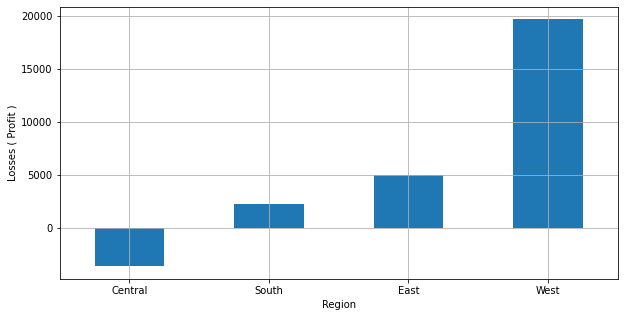

In [33]:
returns.groupby('Region').sum()['Profit'].sort_values().plot(kind = 'bar', rot = 0 , figsize = (10,5),grid=True)
plt.ylabel('Losses ( Profit )')
plt.show()


# Analyzing Sales and Profit


In [34]:
# finding year on year sales growth


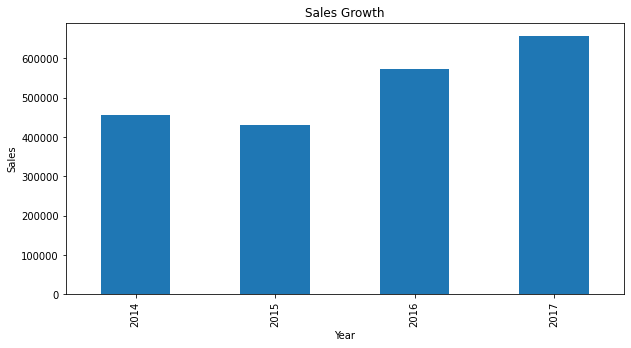

In [37]:
sales = orders.groupby(orders['Order Date'].dt.to_period('Y'))['Sales'].sum()
sales.plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Growth')
plt.show()

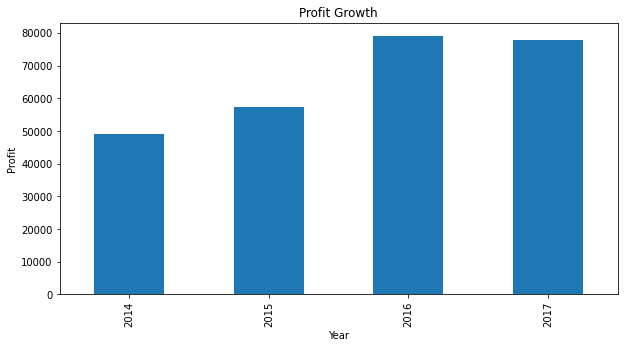

In [38]:
profit = orders.groupby(orders['Order Date'].dt.to_period('Y'))['Profit'].sum()
profit.plot(kind = 'bar', figsize = (10,5))
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Profit Growth')
plt.show()

In [39]:
temp = []
for idx,val in enumerate(sales):
    if idx != 0:
        temp.append(((sales[idx] - sales[idx-1])/sales[idx-1])*100)
pd.DataFrame({'Year':[2015,2016,2017], 'YoY Growth': temp})

,Year,YoY Growth
0,2015,-5.308759
1,2016,33.005704
2,2017,14.767362


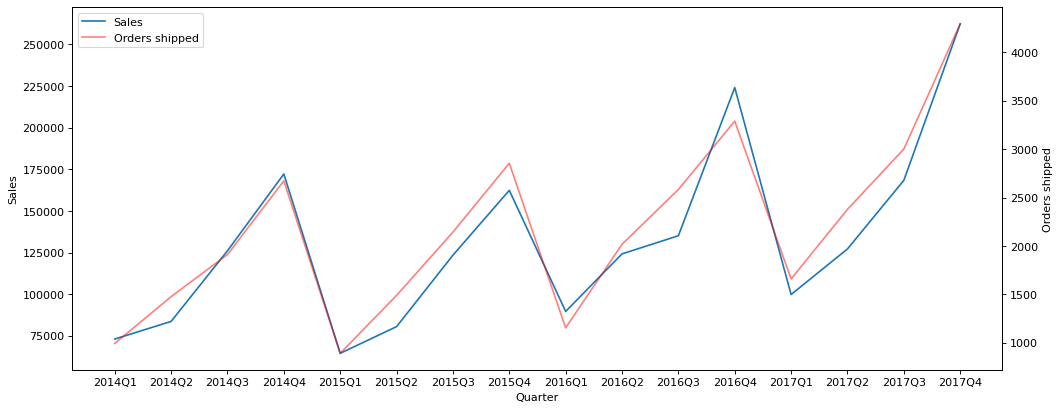

In [40]:
sales = orders.groupby(orders['Order Date'].dt.to_period('Q'))['Sales'].sum()
o_s = orders.groupby(orders['Order Date'].dt.to_period('Q'))['Quantity'].sum()
quarters = orders['Order Date'].dt.to_period('Q')

# looking at profits through quarters
profits = orders.groupby(orders['Order Date'].dt.to_period('Q'))['Profit'].sum()


# (orders & sales) vs profits

plt.figure(figsize=(15, 6), dpi=80)
ax1 = plt.gca()
line1, = ax1.plot(o_s.index.to_series().astype(str), sales)
ax2 = ax1.twinx()
line2, = ax2.plot(o_s.index.to_series().astype(str), o_s, c='r', alpha=0.5)
ax1.set_ylabel("Sales")
ax1.set_xlabel('Quarter')
ax2.set_ylabel("Orders shipped")
ax2.legend((line1, line2),
           ("Sales", "Orders shipped"))

plt.show()


# ratio of sales and orders shipped are similar 


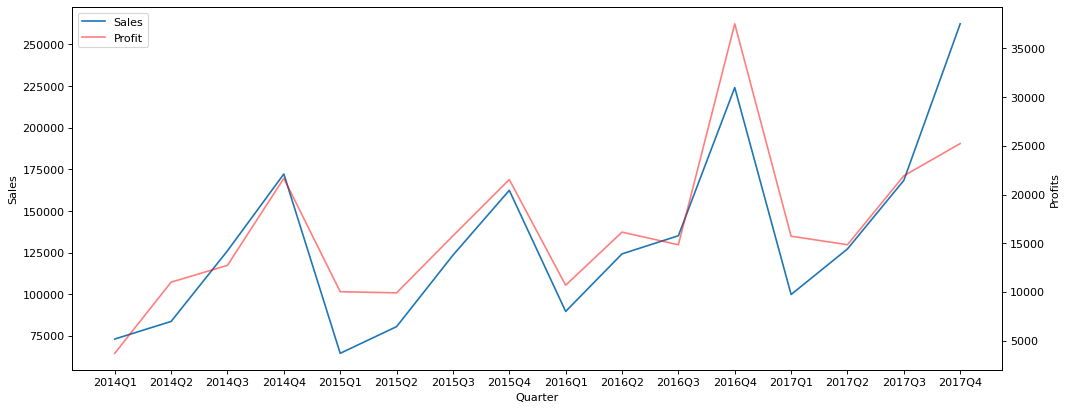

In [41]:
# here we see the pattern where in 2016 q4 sales were less and profit was high, whereas in 2017 q4 sales were high
# but profit wasn't as good ( which is quite the opposite )
plt.figure(figsize=(15, 6), dpi=80)
ax1 = plt.gca()
line1, = ax1.plot(o_s.index.to_series().astype(str), sales)
ax2 = ax1.twinx()
line2, = ax2.plot(o_s.index.to_series().astype(str), profits, c='r', alpha=0.5)
ax1.set_ylabel("Sales")
ax1.set_xlabel('Quarter')
ax2.set_ylabel("Profits")
ax2.legend((line1, line2),
           ("Sales", "Profit"),loc="upper left")


plt.show()


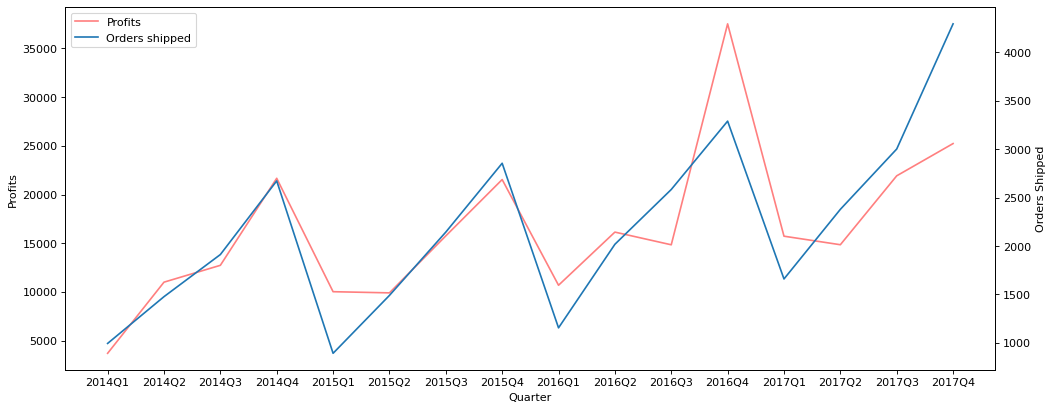

In [42]:
# Profits vs Orders Shipped
# pretty interesting ratio of sales to profit in 2016Q4 vs 2017Q4

plt.figure(figsize=(15, 6), dpi=80)
ax1 = plt.gca()
line1, = ax1.plot(o_s.index.to_series().astype(str), profits, c='r', alpha=0.5)
ax2 = ax1.twinx()
line2, = ax2.plot(o_s.index.to_series().astype(str), o_s )
ax1.set_ylabel("Profits")
ax1.set_xlabel('Quarter')
ax2.set_ylabel("Orders Shipped")
ax2.legend((line1, line2),
           ("Profits", "Orders shipped"))
plt.show()

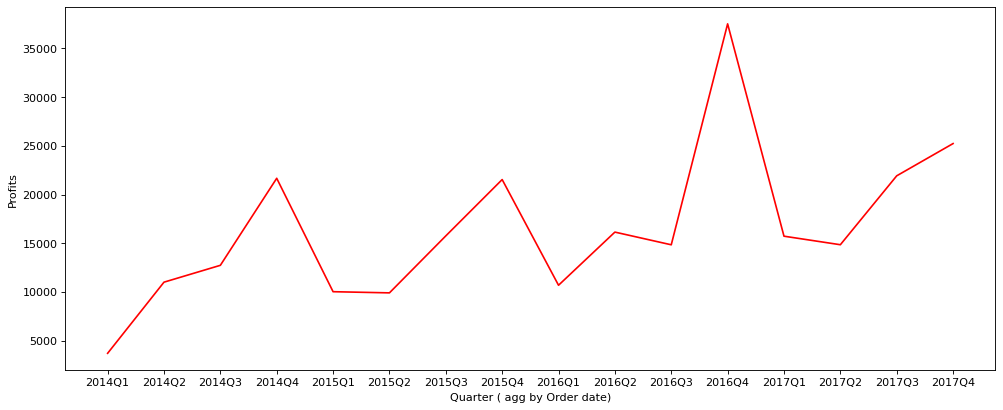

In [43]:
#looking at profits
plt.figure(figsize=(15, 6), dpi=80)
ax1 = plt.gca()
ax1.plot(profits.index.to_series().astype(str), profits, c = 'r')
ax1.set_xlabel('Quarter ( agg by Order date)')
ax1.set_ylabel('Profits')
plt.show()
# see that profits usually increase from Q1 to Q4 each year. This wasn't the case for 2017! 
# we see an increasing trend in the total profit being made year over year but in 2017 the pattern was a little different!
# eventhough the profits weren't as good as 2016Q4, they were still able to beat 2014 and 2015

# Looking at Region Data

In [10]:
for name, grp in orders.groupby('Region'):
    print(name, grp['State'].unique())

Central ['Texas' 'Wisconsin' 'Nebraska' 'Illinois' 'Minnesota' 'Michigan'
 'Indiana' 'Iowa' 'Missouri' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota']
East ['Pennsylvania' 'Delaware' 'New York' 'Ohio' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Rhode Island' 'New Hampshire' 'Maryland'
 'District of Columbia' 'Vermont' 'Maine' 'West Virginia']
South ['Kentucky' 'Florida' 'North Carolina' 'Virginia' 'Tennessee' 'Alabama'
 'South Carolina' 'Louisiana' 'Georgia' 'Mississippi' 'Arkansas']
West ['California' 'Washington' 'Utah' 'Arizona' 'Oregon' 'Colorado'
 'New Mexico' 'Nevada' 'Montana' 'Idaho' 'Wyoming']


In [11]:
us_state = pd.read_csv(r'US_State.csv')
            
orders_2 = pd.merge(orders,us_state, on = ['State'])

In [86]:
# the most porfitable is CA and New York, and Texas we made a net loss!!!
temp = orders_2.groupby('Abbreviation').sum().reset_index()
temp = temp.merge(orders_2[['Abbreviation','Region']])

fig = px.choropleth(temp,
                    locations='Abbreviation', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Profit',
                    color_continuous_scale="RdBu", 
                    color_continuous_midpoint=0.0
                    )

fig.add_scattergeo(
    locations=temp['Abbreviation'],
    locationmode="USA-states", 
    text=temp['Abbreviation'] +'(' + temp['Region'].apply(lambda x: x[0]) + ')',
    mode='text',
)
fig.show()

In [17]:
# the most sales took place in CA and New York, and texas there was a lot of sales too, even though we
# made net loss there!!!
temp = orders_2.groupby('Abbreviation').sum().reset_index()
temp = temp.merge(orders_2[['Abbreviation','Region']])

fig = px.choropleth(temp,
                    locations='Abbreviation', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Sales',
                    color_continuous_scale="Blues",                     
                    )

fig.add_scattergeo(
    locations=temp['Abbreviation'],
    locationmode="USA-states", 
    text=temp['Abbreviation'] +'(' + temp['Region'].apply(lambda x: x[0]) + ')',
    mode='text',
)
fig.show()

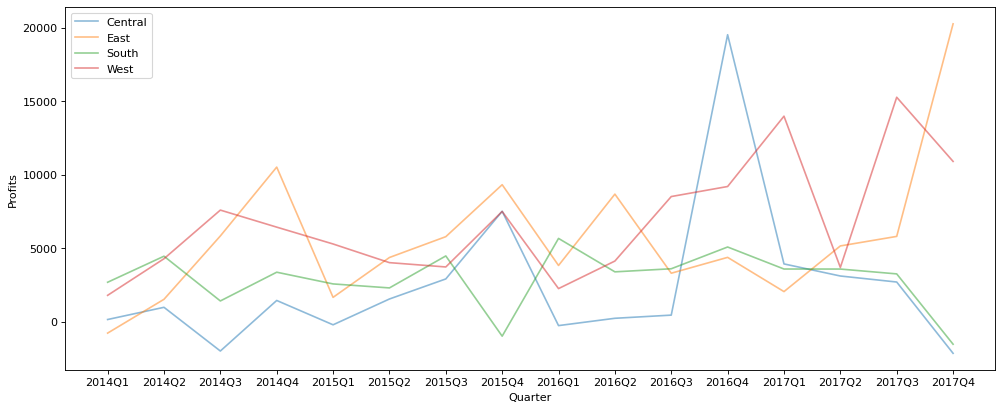

In [19]:
# lets do region wise analysis of the profit of operations
# we see that in 2016 Q4 the profits for central and west region shot up
# however in 2017Q4 the profits for south and central region tanked eventhough profits from east and west region shot
# up
# Central Region has great potential, it lead to the least profit but lead to great profit in 2016Q4
order_grp = orders.groupby('Region')

plt.figure(figsize=(15, 6), dpi=80)
# order_grp.groupby(orders['Ship Date'].dt.to_period('Q'))['Profit'].sum()
for name, group in order_grp:
#     print(name)
    ax1 = plt.gca()
    new_g = group.groupby(orders['Order Date'].dt.to_period('Q'))['Profit'].sum()
#     print(name, new_g)
    ax1.plot(new_g.index.to_series().astype(str), new_g, alpha=0.5)
    


plt.gca().legend(('Central', 'East', 'South', 'West'))
plt.gca().set_xlabel('Quarter')
plt.gca().set_ylabel('Profits')


plt.show()


In [20]:
# There are alot of Orders in the last quarter!
orders.groupby(orders['Order Date'].dt.to_period('Q')).count()['Row ID']

Order Date
2014Q1     282
2014Q2     392
2014Q3     564
2014Q4     755
2015Q1     260
2015Q2     444
2015Q3     592
2015Q4     806
2016Q1     335
2016Q2     594
2016Q3     740
2016Q4     918
2017Q1     500
2017Q2     690
2017Q3     903
2017Q4    1219
Freq: Q-DEC, Name: Row ID, dtype: int64

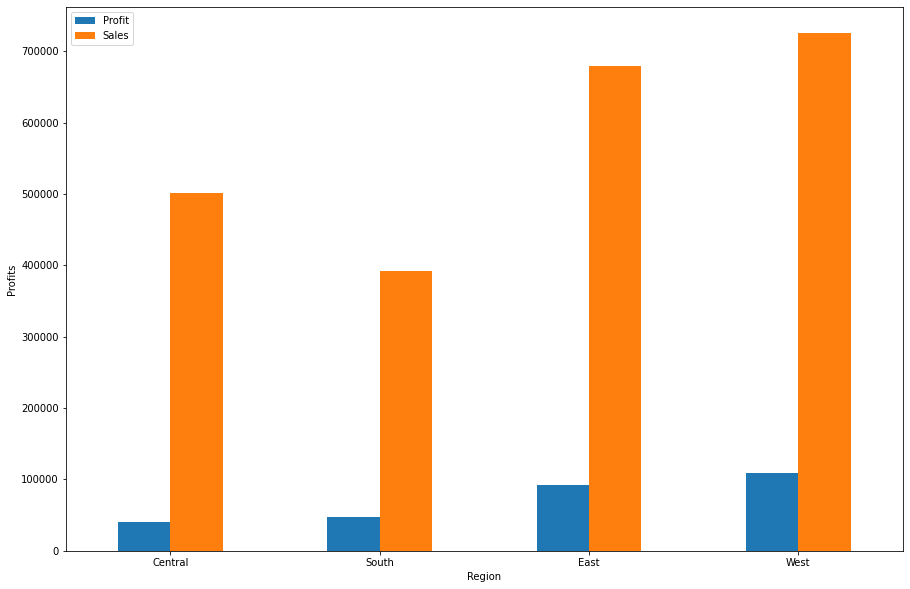

In [21]:
# Most profitable Region
# We see that West is the most profitable region
order_grp.sum()[['Profit','Sales']].sort_values(by = 'Profit').plot(kind = 'bar', figsize = (15,10), rot = 0)
plt.xlabel('Region')
plt.ylabel('Profits')
plt.show()

In [433]:

# relationship b/w profit and discount

In [121]:
# find most valuable customers
# only 793 customers

orders.groupby('Customer ID').sum().sort_values(by=['Profit'])

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Customer ID,,,,,,
CS-12505,48397,558704,5690.055,40,1.8,-6626.3895
GT-14635,11102,99126,9351.212,26,1.5,-4108.6589
LF-17185,82023,933543,3930.509,69,5.1,-3583.9770
SR-20425,43929,539308,3233.481,34,3.3,-3333.9144
HG-14965,97063,1174079,3247.642,68,2.9,-2797.9635
...,...,...,...,...,...,...
AB-10105,130088,1359311,14473.571,73,4.8,5444.8055
HL-15040,21159,646404,12873.298,50,0.2,5622.4292
SC-20095,73852,1671032,14142.334,87,1.4,5757.4119


# Doing Segment Wise Analysis

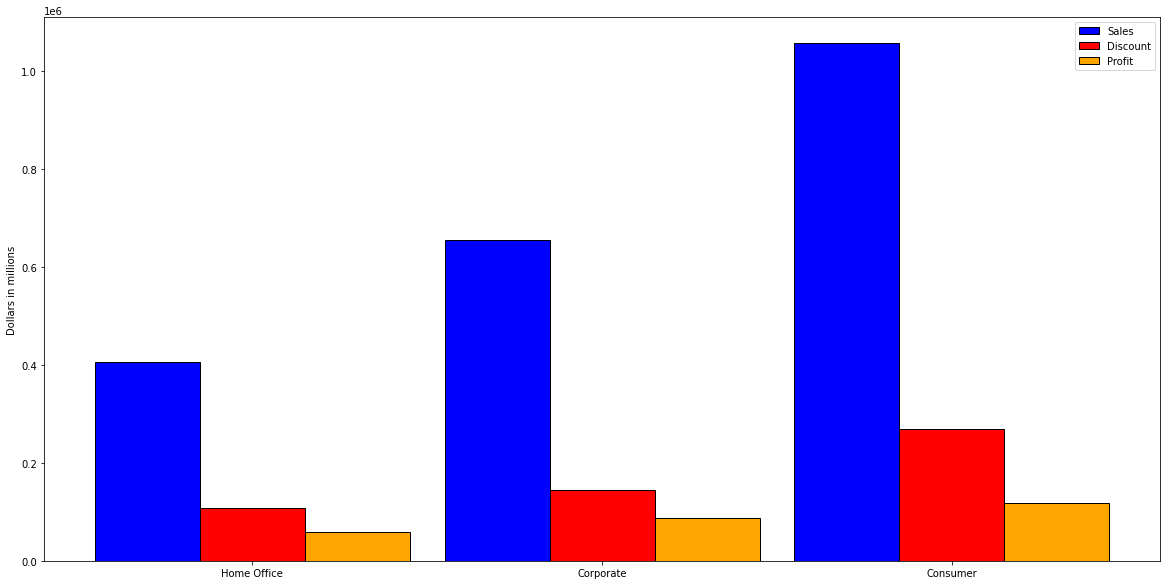

In [407]:
# there are 3 segments, Consumer, Corporate and Home Office

plt.figure(figsize = (20,10))

# width of the bars
barWidth = 0.3
s = orders.groupby('Segment').sum().sort_values(by=['Profit'])['Sales'].sort_values()
d = orders.groupby('Segment').apply(lambda x: (x['Sales']/(1 - x['Discount']))*x['Discount']).reset_index().groupby('Segment').sum()[0].sort_values()
p = orders.groupby('Segment').sum().sort_values(by=['Profit'])['Profit'].sort_values()

# The x position of bars
r1 = np.arange(len(q))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, s, width = barWidth, color = 'blue', edgecolor = 'black', capsize=7, label='Sales')
plt.bar(r2, d, width = barWidth, color = 'red', edgecolor = 'black', capsize=7, label='Discount')
plt.bar(r3, p, width = barWidth, color = 'orange', edgecolor = 'black', capsize=7, label='Profit')

# general layout
plt.xticks([r + barWidth for r in range(len(r1))], ['Home Office', 'Corporate', 'Consumer'])
plt.ylabel('Dollars in millions')
plt.legend()
plt.show()




# most profitable is Consumer segment
# sales has an increasing trend, additionally discount has an increasing trend, profit also has an increasing trend



In [411]:
# per quantity homeoffice has the most mean profitable followed 
orders.groupby('Segment').apply(lambda x: x['Profit'] / x['Quantity']).reset_index().groupby('Segment').mean()

,level_1,0
Segment,,
Consumer,4935.117314,6.544193
Corporate,5161.452407,8.097686
Home Office,4993.336735,10.280852


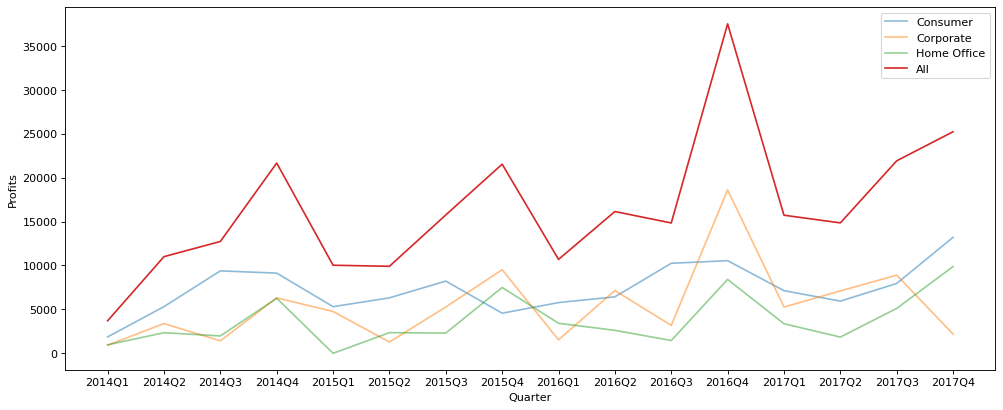

In [413]:
# plotting segment wise profit time series
# plot profits, segment wise 
# we see that in 2016 q4 vs 2017 q4 the difference is in the profit of the corporate segment
# both consumer and home office did better but profit in corporate segment tanked
order_grp = orders.groupby('Segment')
plt.figure(figsize=(15, 6), dpi=80)
# order_grp.groupby(orders['Ship Date'].dt.to_period('Q'))['Profit'].sum()
for name, group in order_grp:
#     print(name)
    ax1 = plt.gca()
    new_g = group.groupby(orders['Order Date'].dt.to_period('Q'))['Profit'].sum()
#     print(name, new_g)
    ax1.plot(new_g.index.to_series().astype(str), new_g, alpha=0.5)
    
ax1 = plt.gca()
line1, = ax1.plot(profits.index.to_series().astype(str), profits)

plt.gca().legend(('Consumer', 'Corporate', 'Home Office', 'All'))
plt.gca().set_xlabel('Quarter')
plt.gca().set_ylabel('Profits')


plt.show()

# Tracking Customers 

In [44]:
temp = orders.groupby(['Customer ID','Segment']).sum()
temp.shape()

TypeError: 'tuple' object is not callable

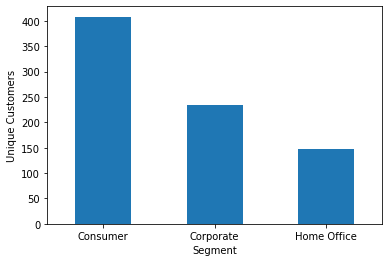

In [46]:
orders.groupby(['Segment']).nunique()['Customer ID'].plot(kind = 'bar',rot = 0)
plt.xlabel('Segment')
plt.ylabel('Unique Customers')
plt.show()

In [47]:
# adding quarter
orders['Quarter'] = orders['Order Date'].map(lambda x: x.to_period('Q'))

C:\Users\ayush\AppData\Local\Temp/ipykernel_13920/1810069468.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



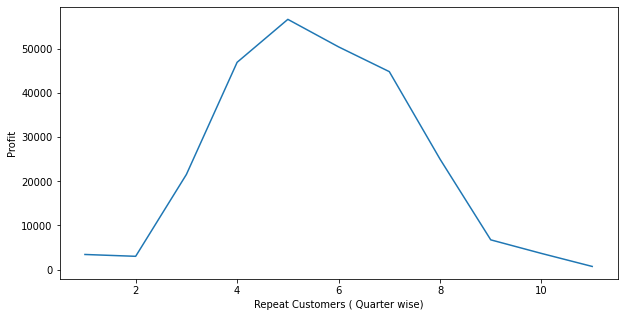

In [49]:
a = orders.groupby(['Customer ID','Segment']).nunique()['Quarter'].sort_values().reset_index()

b = orders.groupby(['Customer ID','Segment']).sum()['Profit'].reset_index()

c = pd.merge(a,b).groupby('Quarter').agg(['sum'])

c.plot(figsize = (10,5),legend=False)

# does repeat buyers lead to more profit

# pd.merge(a,b).groupby('Quarter').mean()
plt.xlabel('Repeat Customers ( Quarter wise)')
plt.ylabel('Profit')
plt.show()





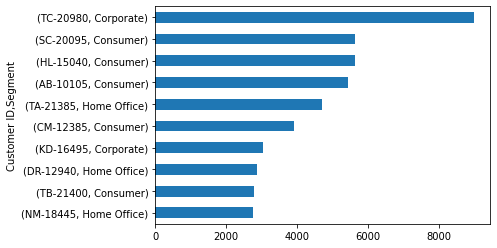

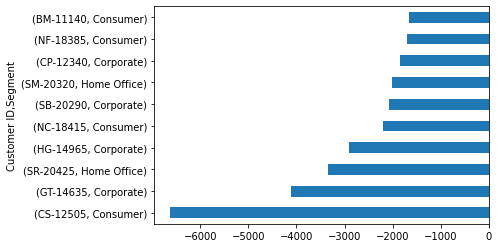

In [610]:
# top 10 most profitable customer are
orders.groupby(['Customer ID','Segment']).sum().sort_values('Profit').tail(10)['Profit'].plot(kind = 'barh')
plt.show()
# top 10 least profitable customer are
orders.groupby(['Customer ID','Segment']).sum().sort_values('Profit').head(10)['Profit'].plot(kind = 'barh')
plt.show()

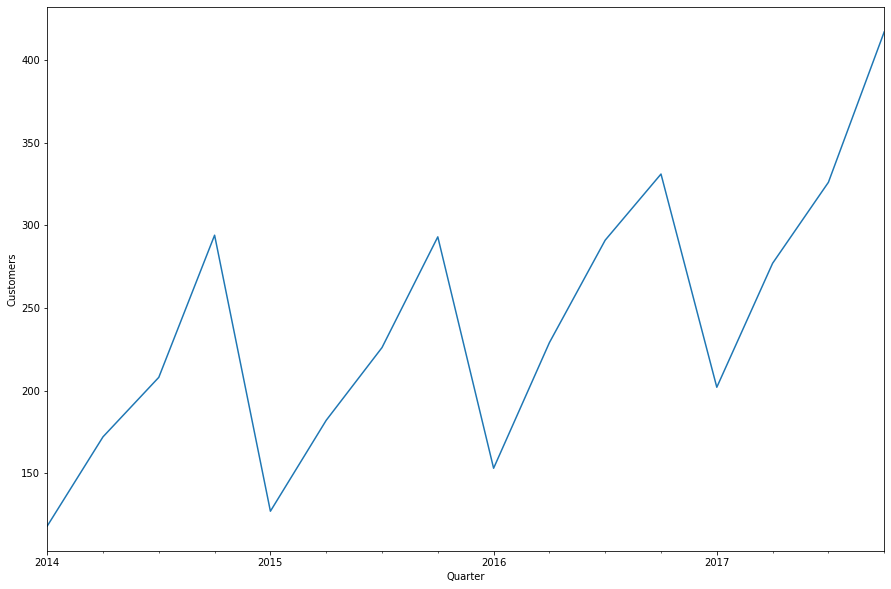

In [490]:
# Very interesting to see such a seasonal trend of customers which keeps increasing!
orders.groupby(orders['Order Date'].dt.to_period('Q')).nunique()['Customer ID'].plot(figsize = (15,10))
plt.xlabel('Quarter')
plt.ylabel('Customers')
plt.show()

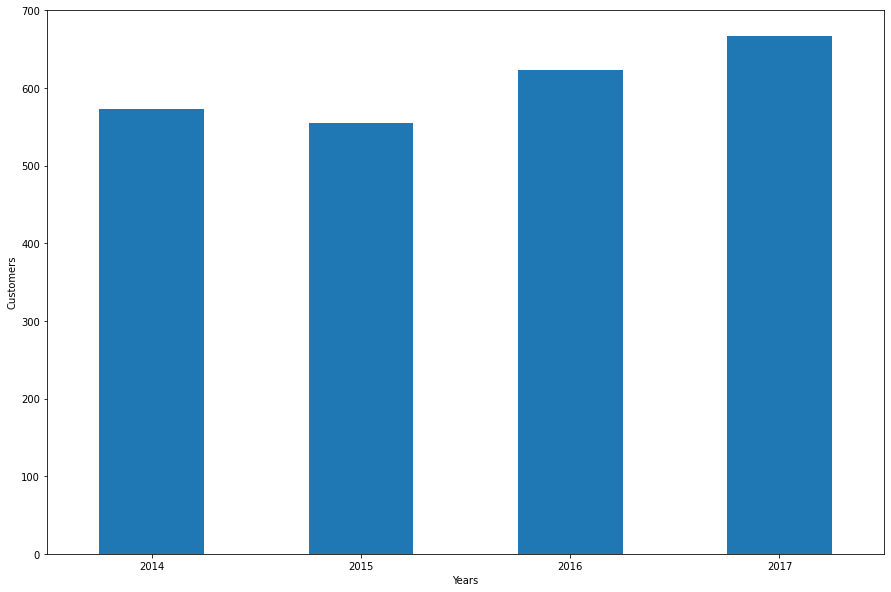

In [50]:
# increase in customers over years, only saw change in 2015
orders.groupby(orders['Order Date'].dt.to_period('Y')).nunique()['Customer ID'].plot(kind = 'bar', figsize = (15,10),rot = 0)
plt.xlabel('Years')
plt.ylabel('Customers')
plt.show()

# Products

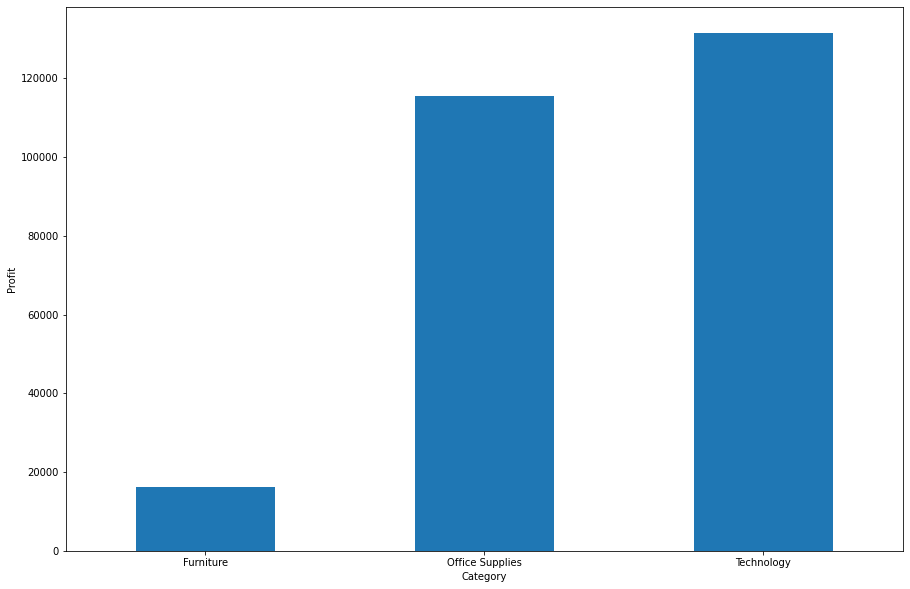

In [620]:
orders.groupby('Category').sum()['Profit'].plot(kind = 'bar',figsize = (15,10),rot=0)
plt.ylabel('Profit')
plt.show()

In [631]:
orders.groupby(['Category','Region']).sum().reset_index()

0     -2293.5395
1      2918.7156
2      6208.4487
3      9276.5293
4     12176.9531
5     38849.0561
6     19412.5353
7     45158.3603
8     33457.3763
9     44770.2077
10    18909.8358
11    34320.1815
Name: Profit, dtype: float64

Central
East
South
West


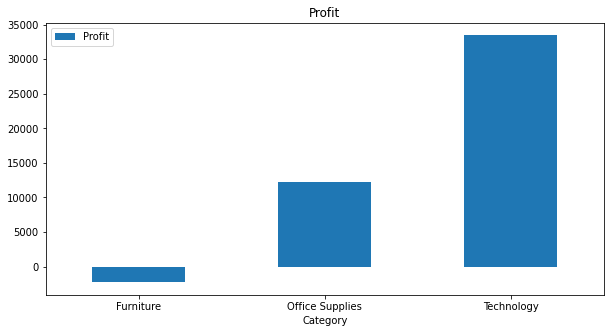

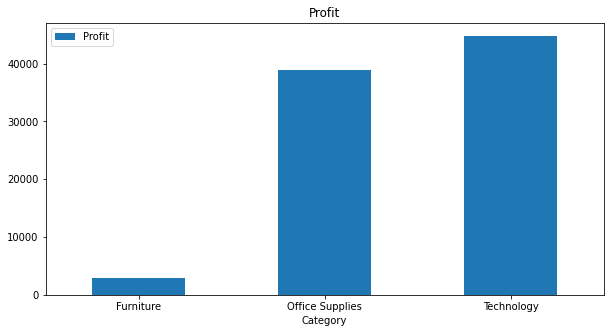

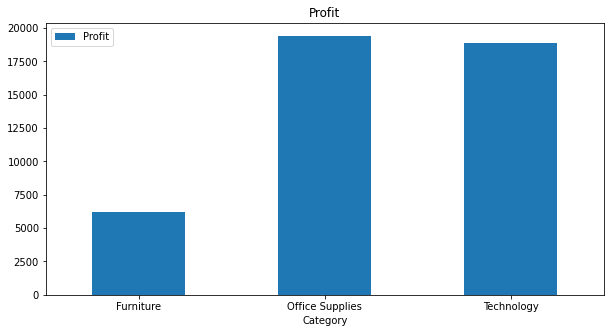

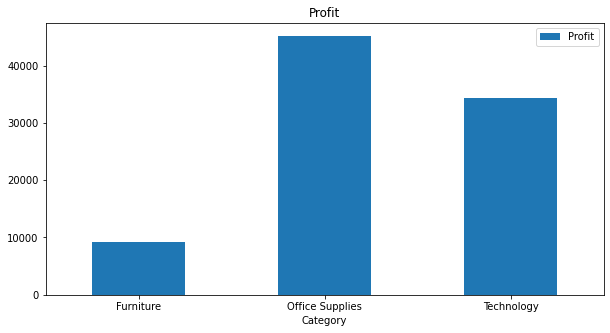

In [647]:
for name, group in orders.groupby(['Category','Region']).sum()['Profit'].reset_index().groupby('Region'):
    print(name)
    group[['Category','Profit']].set_index('Category').plot(kind = 'bar',figsize = (10,5),rot=0,subplots = True)

Central


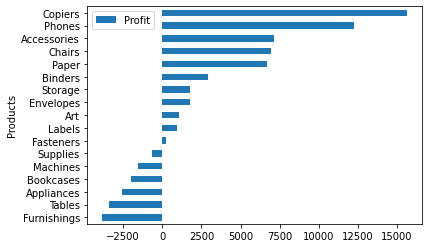

East


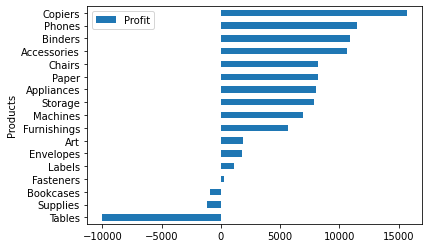

South


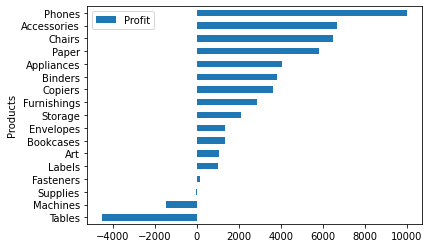

West


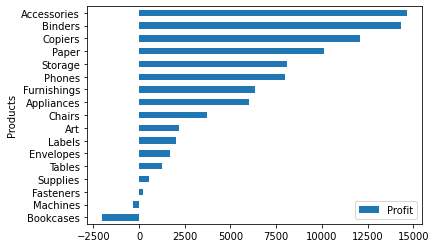

In [661]:
for name, group in orders.groupby(['Region','Category','Sub-Category']).sum().reset_index().groupby('Region'):
    print(name)
    
    group[['Sub-Category','Profit']].set_index('Sub-Category').sort_values('Profit').plot(kind = 'barh',rot = 0)
    plt.ylabel('Products')
    plt.show()

In [19]:
returns = pd.read_excel(r'Sample - Tableau Superstore Dataset.xls', sheet_name = 1)

In [20]:
returns

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [21]:
people = pd.read_excel(r'Sample - Tableau Superstore Dataset.xls', sheet_name = 2)

In [22]:
people

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


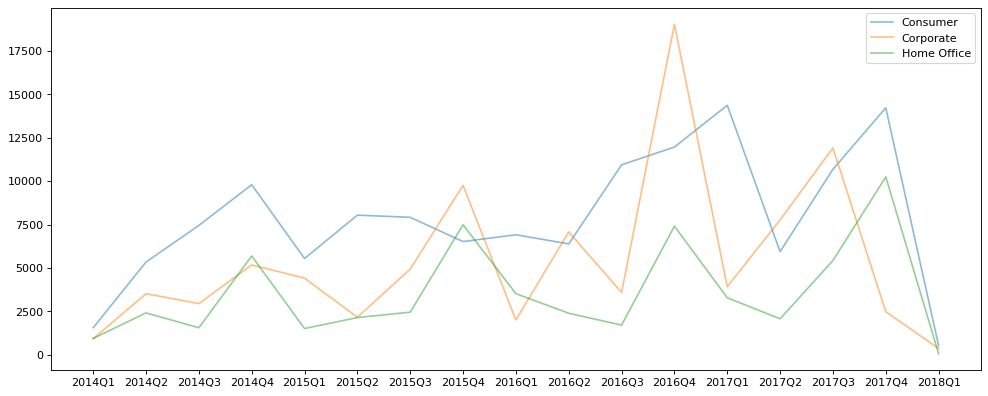

In [132]:
orders['Ship Date']

0      2016-11-11
1      2016-11-11
2      2016-06-16
3      2015-10-18
4      2015-10-18
          ...    
9989   2014-01-23
9990   2017-03-03
9991   2017-03-03
9992   2017-03-03
9993   2017-05-09
Name: Ship Date, Length: 9994, dtype: datetime64[ns]

,Profit,Discount
0,41.9136,0.00
1,219.5820,0.00
2,6.8714,0.00
3,-383.0310,0.45
4,2.5164,0.20
...,...,...
9986,15.2208,0.00
9987,28.7964,0.00
9988,55.6470,0.00
9989,4.1028,0.20


In [62]:
from pandas.plotting import parallel_coordinates

# fig = px.parallel_coordinates(orders[['Profit','Discount']],
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

# Make the plot
parallel_coordinates(orders[['Discount','Profit']],colormap=plt.get_cmap("Set2"))
plt.show()

TypeError: parallel_coordinates() missing 1 required positional argument: 'class_column'

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

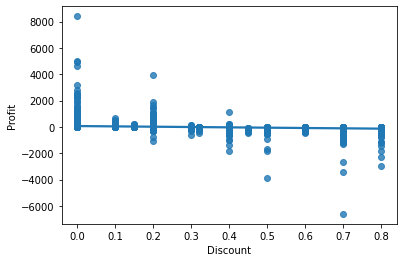

In [63]:
import seaborn as sns

df = orders[['Discount','Profit']]
# use the function regplot to make a scatterplot


In [74]:
x = orders[['Discount','Profit','Sales']]
x['Discount'] = (x['Sales']/(1 - x['Discount']))*x['Discount']

C:\Users\ayush\AppData\Local\Temp/ipykernel_13920/1782430495.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



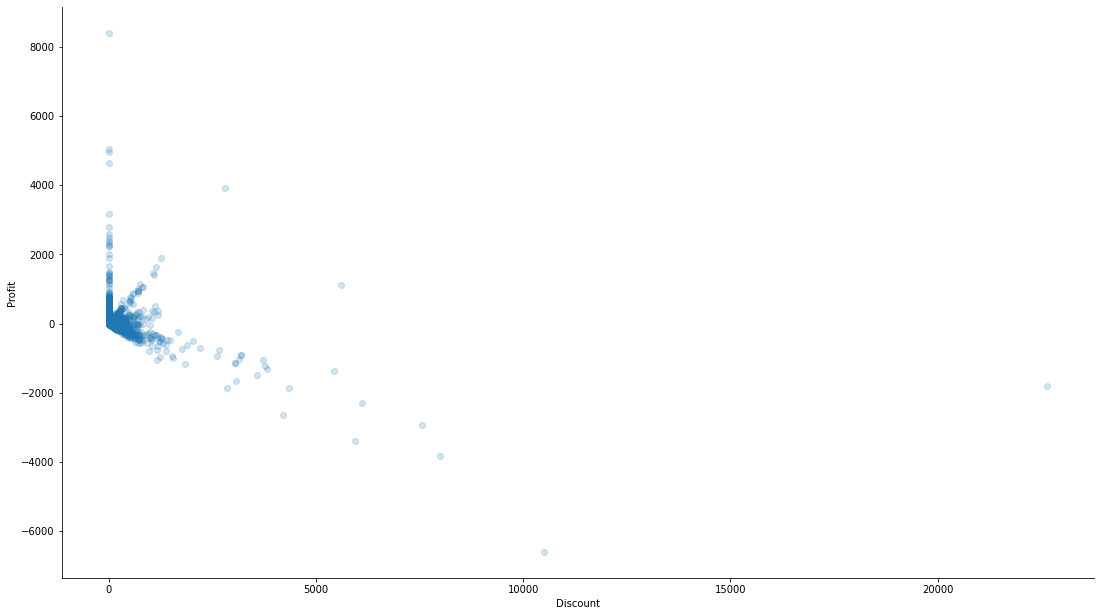

In [85]:
g = sns.regplot(x=x["Discount"], y=x["Profit"], fit_reg=False,  scatter_kws={'alpha':0.2})
g.figure.set_size_inches(18.5, 10.5)
sns.despine()
plt.show()